In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

**One-sample t-test**

In [2]:
# Set population parameters
n = 50 # Sample size
mu = 0 # Population mean
sigma = 1 # Population standart deviation

In [5]:
# Define the distribution
dist = stats.norm(loc=mu, scale=sigma)

In [6]:
# Generate a sample
a = dist.rvs(n)

In [20]:
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 256)
y = dist.pdf(x)

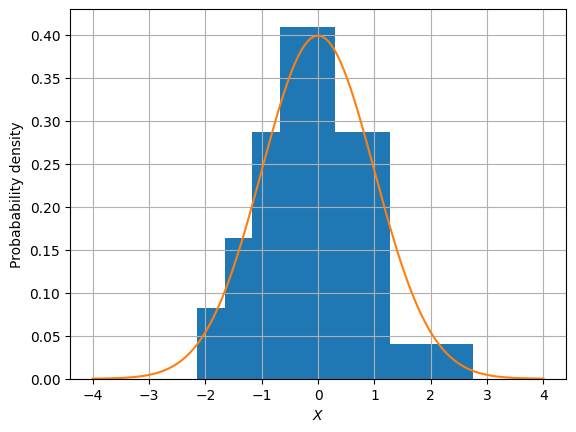

In [21]:
plt.hist(a, density=True)
plt.plot(x, y)
plt.grid()
plt.xlabel("$ X $")
# plt.ylabel("$ y $")
plt.ylabel("Probabability density")
plt.show()

Sample mean:
$$ \hat{\mu}_X = \overline{X} = \cfrac{1}{n} \sum_{i = 1}^{n}{X_i} $$

Sample variance:
$$ \hat{\sigma}^2_X = S^2_X = \cfrac{1}{n - 1} \sum_{i = 1}^{n}{\left( X_i - \overline{X} \right)^2} $$

In [26]:
# Calculate sample statistics
m = np.mean(a)
s = np.var(a, ddof=1)
# std = np.std(a, ddof=1)

print(f"Sample mean : {m}")
print(f"Sample variance : {s}")

Sample mean : -0.011512697709607864
Sample variance : 1.0245033415759952


In [27]:
# Define the null Hypothesis
mu_0 = 0

t statistic:
$$ t = \cfrac{\hat{\mu}_X - \mu_0}{\sqrt{\hat{\sigma}^2_X / n}} \sim t_{n - 1} $$

In [28]:
t = (m - mu_0) / np.sqrt(s / n)
print(t)

-0.08042765642673722


In [36]:
stats.ttest_1samp(a, mu_0, alternative='two-sided')

TtestResult(statistic=-0.08042765642673722, pvalue=0.9362247306743827, df=49)


**Two-sample t-test**

$$ \left(X_1, \, X_2, \, \dots, \, X_n \right) : X_i \sim X $$
$$ \left(Y_1, \, Y_2, \, \dots, \, Y_m \right) : Y_j \sim Y $$

$$ \hat{\mu}_X = \overline{X} = \cfrac{1}{n} \sum_{i = 1}^{n}{X_i}, \quad 
\hat{\sigma}^2_X = \cfrac{1}{n - 1} \sum_{i = 1}^{n}{\left(X_i - \overline{X} \right)^2} $$
$$ \hat{\mu}_Y = \overline{Y} = \cfrac{1}{m} \sum_{j = 1}^{m}{Y_j}, \quad 
\hat{\sigma}^2_Y = \cfrac{1}{m - 1} \sum_{j = 1}^{m}{\left(Y_j - \overline{Y} \right)^2} $$

\begin{equation}
    \begin{split}
        & \hat{\mu}_X \sim AN\left(\mu_X, \, \cfrac{\sigma^2_X}{n}\right), \quad 
        \hat{\mu}_Y \sim AN\left(\mu_Y, \, \cfrac{\sigma^2_Y}{m}\right) \implies \\
        \implies & \hat{\mu}_X - \hat{\mu}_Y \sim AN\left(\mu_X - \mu_Y, \, \cfrac{\sigma^2_X}{n} + \cfrac{\sigma^2_Y}{m}\right) \implies \\
        \implies & \left(\hat{\mu}_X - \hat{\mu}_Y \right) - \left(\mu_X - \mu_Y \right) \sim AN\left(0, \, \cfrac{\sigma^2_X}{n} + \cfrac{\sigma^2_Y}{m}\right) \implies \\
        \implies & \cfrac{\left(\hat{\mu}_X - \hat{\mu}_Y \right) - \left(\mu_X - \mu_Y \right)}{\sqrt{\cfrac{\sigma^2_X}{n} + \cfrac{\sigma^2_Y}{m}}} \sim AN\left(0, \, 1 \right)
    \end{split}
\end{equation}

$$ H_0 : \mu_X = \mu_Y \iff \mu_X - \mu_Y = 0 $$

$$
t = \cfrac{\hat{\mu}_{X} - \hat{\mu}_{Y}}{\sqrt{\cfrac{\hat{\sigma}^2_X}{n} + \cfrac{\hat{\sigma}^2_Y}{m}}} \sim t_{df}
$$

In [46]:
mu1 = -2
sigma1 = 1
dist1 = stats.norm(loc=mu1, scale=sigma1)

In [47]:
mu2 = 2
sigma2 = 1
dist2 = stats.norm(loc=mu2, scale=sigma2)

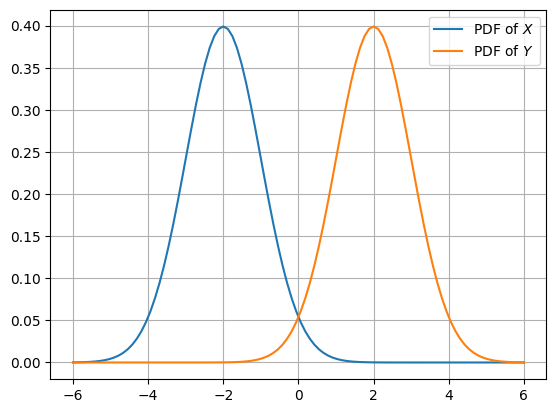

In [61]:
# x_min = np.min([mu1 - 3 * sigma1, mu2 - 3 * sigma2])
# x_max = np.max([mu1 + 3 * sigma1, mu2 + 3 * sigma2])
# x = np.linspace(x_min, x_max)
x = np.linspace(-6, 6, 100)
y1 = dist1.pdf(x)
y2 = dist2.pdf(x)
plt.plot(x, y1, label="PDF of $ X $")
plt.plot(x, y2, label="PDF of $ Y $")
plt.grid()
# plt.ylim(0, 1)
plt.legend()
plt.show()

In [52]:
a = dist1.rvs(20)
b = dist2.rvs(30)

In [53]:
def two_sample_t_test(a, b):
    n = np.size(a)
    m1 = np.mean(a)
    s1 = np.var(a, ddof=1)

    m = np.size(b)
    m2 = np.mean(b)
    s2 = np.var(b, ddof=1)

    t = (m1 - m2) / np.sqrt(s1 / n + s2 / m)
    return t

In [54]:
two_sample_t_test(a, b)

-13.161774005717529

In [55]:
stats.ttest_ind(a=a, b=b, equal_var=False)

TtestResult(statistic=-13.161774005717529, pvalue=1.0981868457989e-15, df=37.77275972776531)